# Predicting Customer Churn in the Telco Industry
___
The [data](https://www.kaggle.com/blastchar/telco-customer-churn/home) contains customer information from a telcom company, including demographic information and services they were using. The data also contains information about customers who left in the last month. This data can be used to predict the behavior of other customers in order to improve retention. 

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Exploratory Data Analysis

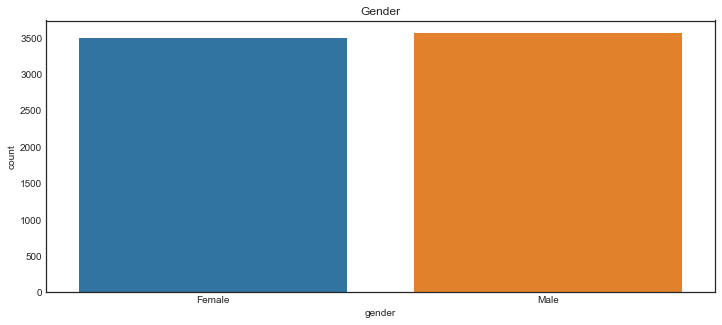

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x="gender", data=df);
plt.title('Gender')


plt.show()

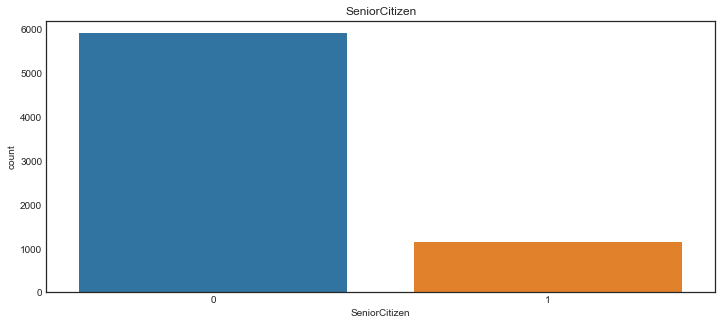

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x="SeniorCitizen", data=df);
plt.title('SeniorCitizen')


plt.show()

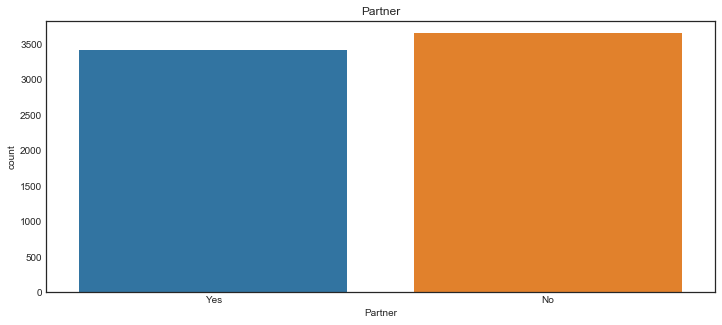

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x="Partner", data=df);
plt.title('Partner')


plt.show()

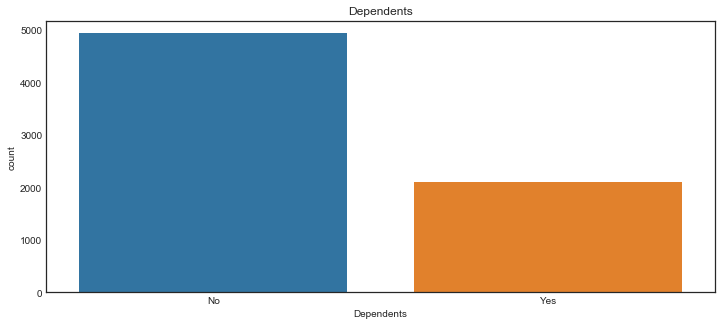

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x="Dependents", data=df);
plt.title('Dependents')


plt.show()

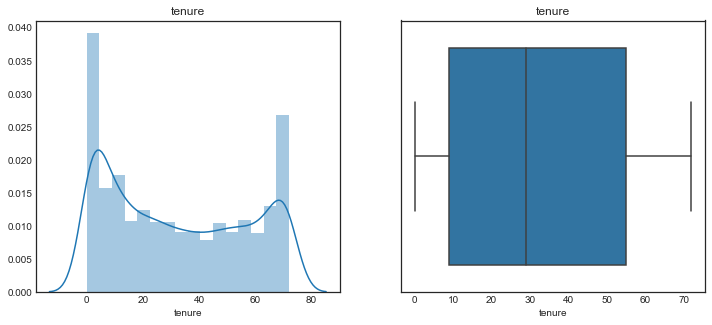

In [10]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(1, 2, 2)
sns.boxplot(df['tenure'])
plt.title('tenure')

plt.show()

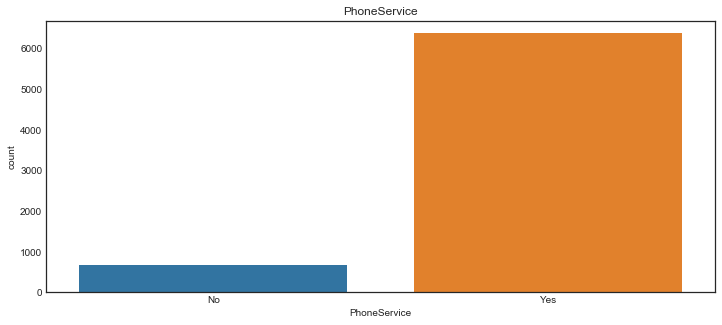

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x="PhoneService", data=df);
plt.title('PhoneService')


plt.show()

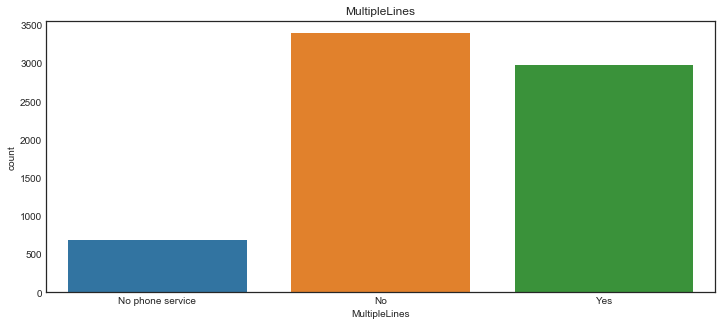

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x="MultipleLines", data=df);
plt.title('MultipleLines')


plt.show()

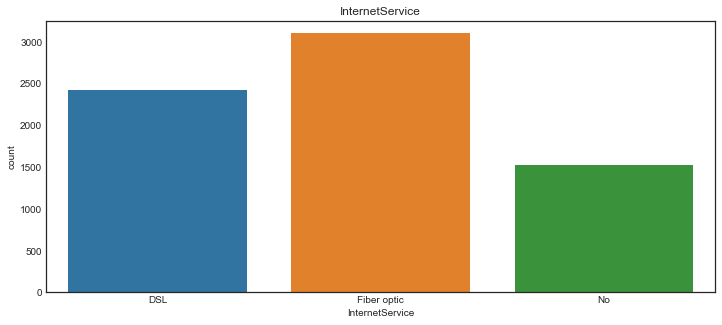

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x="InternetService", data=df);
plt.title('InternetService')


plt.show()

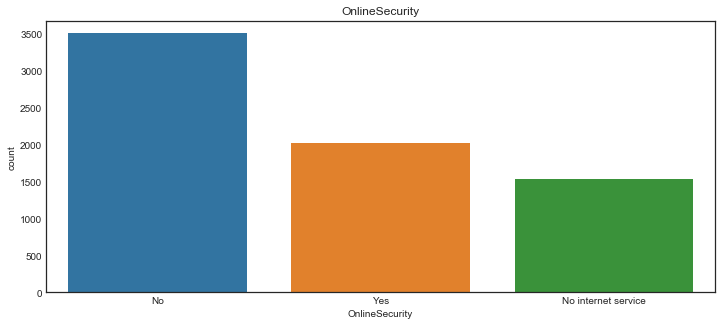

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x="OnlineSecurity", data=df);
plt.title('OnlineSecurity')


plt.show()

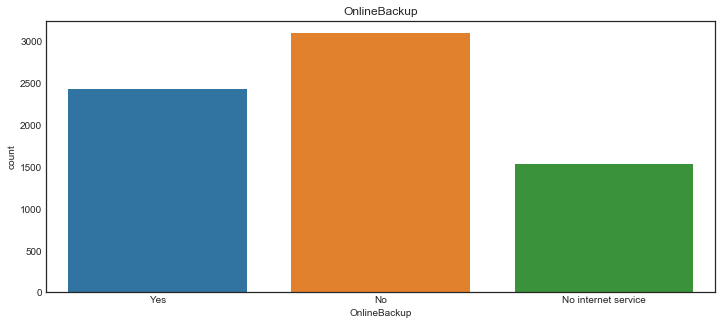

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x="OnlineBackup", data=df);
plt.title('OnlineBackup')


plt.show()

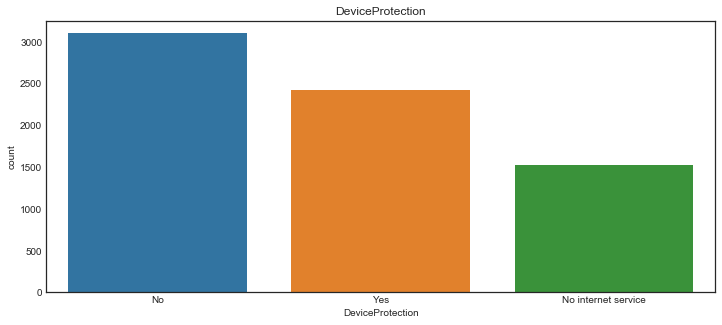

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x="DeviceProtection", data=df);
plt.title('DeviceProtection')


plt.show()

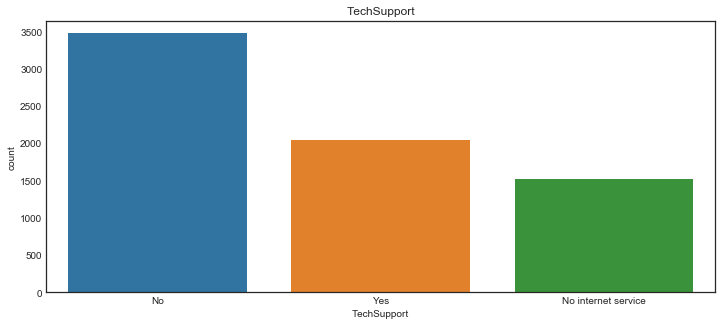

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x="TechSupport", data=df);
plt.title('TechSupport')


plt.show()

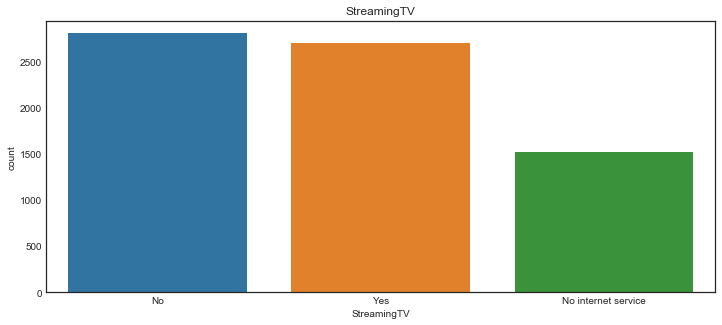

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x="StreamingTV", data=df);
plt.title('StreamingTV')


plt.show()

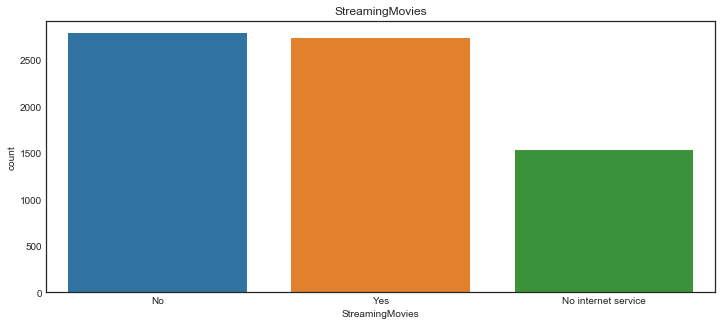

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x="StreamingMovies", data=df);
plt.title('StreamingMovies')


plt.show()

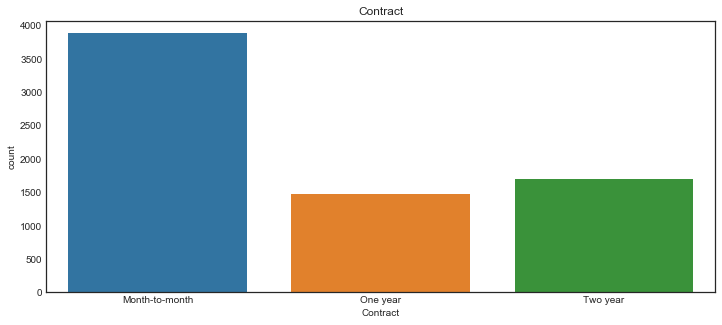

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x="Contract", data=df);
plt.title('Contract')


plt.show()

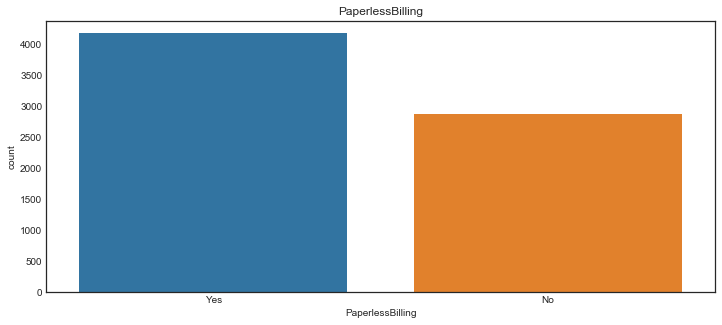

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaperlessBilling", data=df);
plt.title('PaperlessBilling')


plt.show()

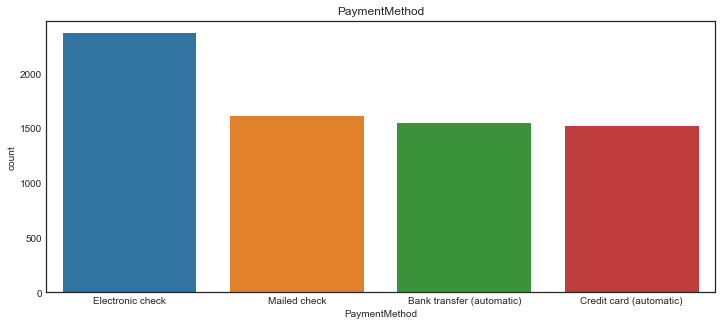

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaymentMethod", data=df);
plt.title('PaymentMethod')


plt.show()

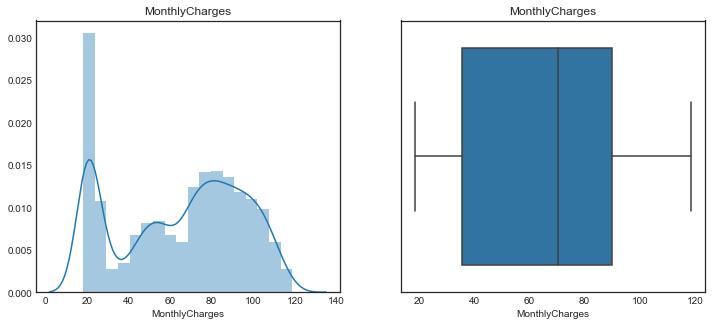

In [23]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.show()

In [57]:
for i in range(len(df)):
    q = float(df['TotalCharges'][i])
    print(i, df['TotalCharges'][i])

0 29.85
1 1889.5
2 108.15
3 1840.75
4 151.65
5 820.5
6 1949.4
7 301.9
8 3046.05
9 3487.95
10 587.45
11 326.8
12 5681.1
13 5036.3
14 2686.05
15 7895.15
16 1022.95
17 7382.25
18 528.35
19 1862.9
20 39.65
21 202.25
22 20.15
23 3505.1
24 2970.3
25 1530.6
26 4749.15
27 30.2
28 6369.45
29 1093.1
30 6766.95
31 181.65
32 1874.45
33 20.2
34 45.25
35 7251.7
36 316.9
37 3548.3
38 3549.25
39 1105.4
40 475.7
41 4872.35
42 418.25
43 4861.45
44 981.45
45 3906.7
46 97
47 144.15
48 4217.8
49 4254.1
50 3838.75
51 1426.4
52 1752.65
53 633.3
54 4456.35
55 1752.55
56 6311.2
57 7076.35
58 894.3
59 7853.7
60 4707.1
61 5450.7
62 2962
63 957.1
64 857.25
65 244.1
66 3650.35
67 2497.2
68 930.9
69 887.35
70 49.05
71 1090.65
72 7099
73 1424.6
74 177.4
75 6139.5
76 2688.85
77 482.25
78 2111.3
79 1216.6
80 79.35
81 565.35
82 496.9
83 4327.5
84 973.35
85 918.75
86 2215.45
87 1057
88 927.1
89 1009.25
90 2570.2
91 74.7
92 5714.25
93 7107
94 7459.05
95 927.35
96 4748.7
97 113.85
98 1107.2
99 2514.5
100 20.2
101 19.45
10

ValueError: could not convert string to float: 

In [58]:
df['TotalCharges'][488]

' '

In [59]:
len(df[df['TotalCharges'] == ' '])

11

In [24]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float64')

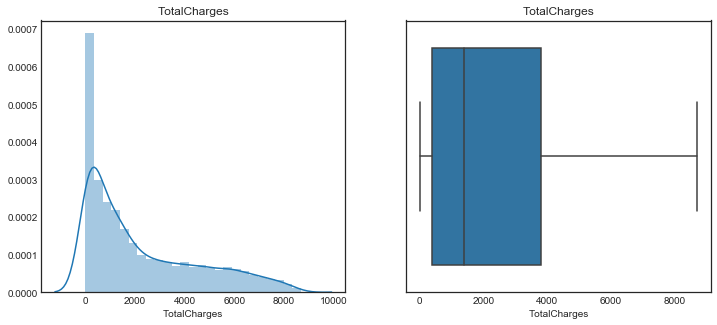

In [61]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.show()

# Examine the target variable

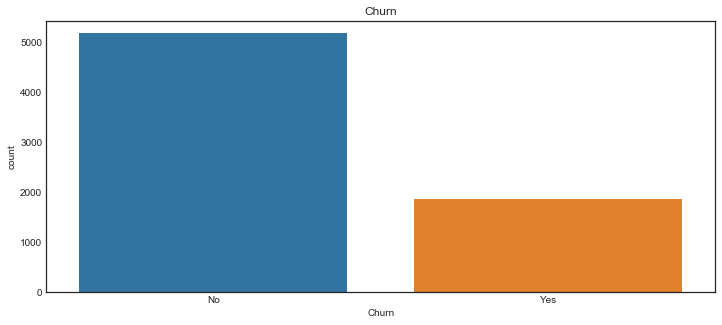

In [62]:
plt.figure(figsize=(12,5))
sns.countplot(x="Churn", data=df);
plt.title('Churn')


plt.show()

In [63]:
len(df[df['Churn'] == 'No']) / len(df)

0.7342150170648464

### Benchmark of 0.734

# Feature Engineering and Selection

In [25]:
#Create dummies
df = pd.get_dummies(data=df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
X = df.drop(['customerID', 'Churn'], axis=1)
df['Churn'] = np.where(df['Churn'] == 'No', 0, 1)
y = df['Churn'].values.reshape(-1, 1)

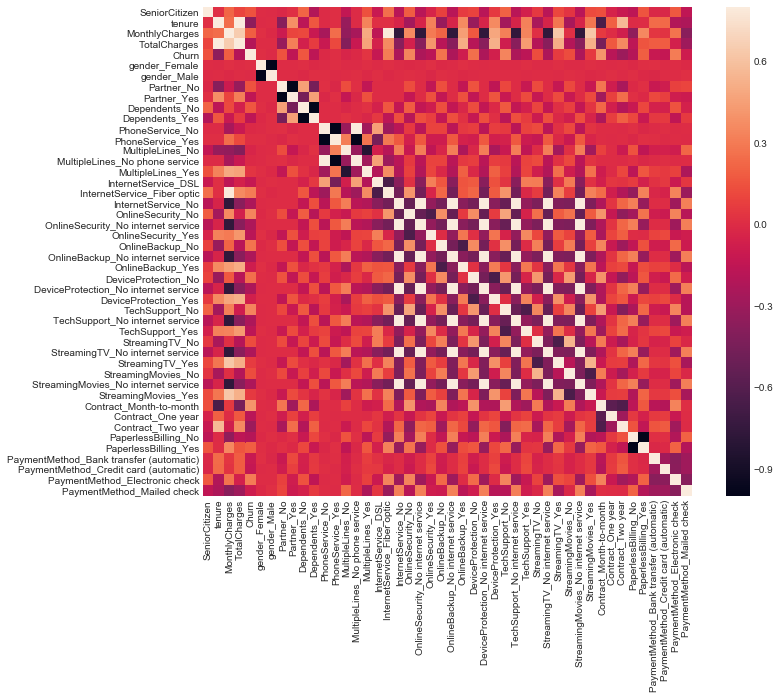

In [65]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Initialize and fit model 

# Naive Bayes

In [66]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y_pred != df['Churn']).sum().sum()
))

Number of mislabeled points out of a total 7032 points : 1979


In [67]:
cross_val_score(bnb, X, y, cv=10)

array([0.72159091, 0.74573864, 0.71164773, 0.74537696, 0.72972973,
       0.6742532 , 0.7083926 , 0.71266003, 0.70412518, 0.71509972])

# KNN

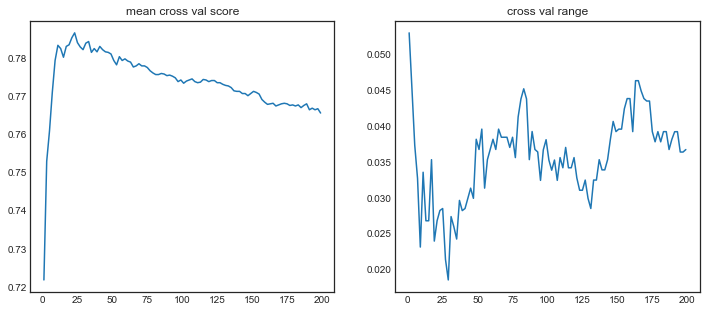

In [68]:
from sklearn.neighbors import KNeighborsClassifier

no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')

plt.show()

In [69]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
11,23,0.786549,0.028168


In [70]:
no_neighbors[no_neighbors['score_range'] == no_neighbors['score_range'].min()]

,k,mean_score,score_range
14,29,0.78214,0.018466


In [71]:
neighbors = KNeighborsClassifier(n_neighbors=23)
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [72]:
cross_val_score(neighbors, X, y, cv=10)

array([0.78267045, 0.79829545, 0.78409091, 0.77809388, 0.78520626,
       0.77382646, 0.79516358, 0.77667141, 0.78947368, 0.8019943 ])

In [73]:
neighbors = KNeighborsClassifier(n_neighbors=29)
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [74]:
cross_val_score(neighbors, X, y, cv=10)

array([0.77840909, 0.79403409, 0.77556818, 0.78378378, 0.77667141,
       0.77951636, 0.78378378, 0.77667141, 0.78236131, 0.79059829])

# Decision Tree

In [75]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
cross_val_score(decision_tree, X, y, cv=10)

array([0.75852273, 0.73011364, 0.73295455, 0.74395448, 0.73257468,
       0.71550498, 0.73968706, 0.72403983, 0.72830725, 0.73646724])

# Random Forest

In [77]:
rfc = ensemble.RandomForestClassifier()


cross_val_score(rfc, X, y, cv=10)

array([0.78835227, 0.78835227, 0.77272727, 0.79374111, 0.75817923,
       0.73968706, 0.78662873, 0.76955903, 0.79516358, 0.77920228])

# Logistic Regression

In [78]:
lr = LogisticRegression(C=1e9)
                      
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y = lr.predict(X)

print('\n Accuracy by churn status')
print(pd.crosstab(pred_y, df['Churn']))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 2.45937997e-01 -6.06340713e-02  2.28630103e-03  3.15995220e-04
  -5.34465463e-02 -8.09900208e-02 -8.70881034e-02 -4.73484637e-02
   1.82336997e-02 -1.52670267e-01  1.12989475e-01 -2.47426042e-01
  -2.43591885e-01  1.12989475e-01 -3.83415748e-03 -3.57944642e-01
   3.26838071e-01 -1.03329996e-01  2.24434685e-01 -1.03329996e-01
  -2.55541256e-01  8.59659855e-02 -1.03329996e-01 -1.17072557e-01
   2.25460218e-02 -1.03329996e-01 -5.36525929e-02  2.27234931e-01
  -1.03329996e-01 -2.58341502e-01 -1.03985298e-01 -1.03329996e-01
   7.28787274e-02 -1.08456339e-01 -1.03329996e-01  7.73497682e-02
   4.94943050e-01 -1.90035469e-01 -4.39344147e-01 -2.41640328e-01
   1.07203761e-01 -8.18215684e-02 -1.70050162e-01  2.68734426e-01
  -1.51299263e-01]]
[-0.13443657]

 Accuracy by churn status
Churn     0     1
row_0            
0      4629   833
1       534  1036

 Percentage accuracy
0.8056029579067122


In [79]:
cross_val_score(lr, X, y, cv=10)

array([0.79403409, 0.81392045, 0.80539773, 0.81792319, 0.78093883,
       0.79658606, 0.81223329, 0.81081081, 0.79800853, 0.80626781])

# SVM

In [25]:
svm = SVC()
cross_val_score(svm, X, y, cv=10)

array([0.77130682, 0.77840909, 0.76988636, 0.76244666, 0.76671408,
       0.74537696, 0.78236131, 0.76955903, 0.77667141, 0.78490028])

# Gradient Boost 

In [28]:
y_gb = df['Churn']
# Find number of estimators
param_test1 = {'n_estimators':np.arange(1, 200)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y_gb)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.80222, std: 0.01874, params: {'n_estimators': 1},
  mean: 0.81995, std: 0.00847, params: {'n_estimators': 2},
  mean: 0.83296, std: 0.01105, params: {'n_estimators': 3},
  mean: 0.83461, std: 0.01302, params: {'n_estimators': 4},
  mean: 0.83959, std: 0.01029, params: {'n_estimators': 5},
  mean: 0.83567, std: 0.01140, params: {'n_estimators': 6},
  mean: 0.83817, std: 0.00946, params: {'n_estimators': 7},
  mean: 0.84250, std: 0.01235, params: {'n_estimators': 8},
  mean: 0.84064, std: 0.01088, params: {'n_estimators': 9},
  mean: 0.84180, std: 0.01048, params: {'n_estimators': 10},
  mean: 0.84163, std: 0.01217, params: {'n_estimators': 11},
  mean: 0.84277, std: 0.00898, params: {'n_estimators': 12},
  mean: 0.84304, std: 0.01044, params: {'n_estimators': 13},
  mean: 0.84505, std: 0.01139, params: {'n_estimators': 14},
  mean: 0.84413, std: 0.01214, params: {'n_estimators': 15},
  mean: 0.84473, std: 0.01076, params: {'n_estimators': 16},
  mean: 0.84426, std: 0.01046, pa